In [16]:
# ACP Topic (aka Iris 4)
import visualID_Eng as vID
from visualID import color
vID.init()

**Start at:** Friday 19 August 2022, 15:29:13  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoPytChem.svg" style="margin-left:auto; margin-right:auto"/></p>

# Statistical treatment of data<br>(data science for beginners)
## 4. Principal Component Analysis (PCA)

<div class="rq">

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to **convert** a set of observations of **possibly correlated variables** into a set of values of **linearly uncorrelated variables** called **principal components** (PC). 
    
It helps you interpret your data and simplifies the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which act as summaries of features. It can be seen as a **compression** algorithm.
    
This transformation is defined in such a way that the first principal component has the largest possible variance, and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing *n* observations) are an uncorrelated orthogonal basis set.

(*From Wikipedia*)

    
PCA is based on the Pearson correlation coefficient (aka *correlation coefficient*) framework and inherits similar assumptions:

- Sample size: Minimum of 150 observations
- Correlations: The feature set is correlated, so the reduced feature set effectively represents the original data space
- Linearity: All variables exhibit a constant multivariate normal relationship, and principal components are a linear combination of the original features
- Outliers: No significant outliers in the data as these can have a disproportionate influence on the results
- Large variance implies more structure: high variance axes are treated as principal components, while low variance axes are treated as noise and discarded

Given a pair of random variables $X$ and $Y$, the Pearson correlation coefficient $\rho(X,Y)$ is defined as:
    
$$\rho(X,Y)=\frac{\mathrm{cov}(X,Y)}{\sigma_{X}\sigma_{Y}}$$
    
where $\mathrm{cov}$ is the covariance and $\sigma_{I}$ is the standard deviation of variable $I$
    
</div>

### 4.1. PCA in a nutshell

#### 4.1.a. Library import

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
dfi=pd.read_csv('./iris-data/iris.csv', sep=";") 
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

Dfi. Structure (shape) :(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### 4.1.b. Standardization

<div class="rq">

PCA is sensitive to the relative scaling of the original variables. This is why it is important to **standardize the data**.
    
Standardization is the process of translating and scaling our features so that they are all *distributed around a mean of zero* with a *standard deviation of one*.
    
Because the features in the Iris dataset are on totally different scales (e.g. the sepal lengths are much longer than the petal widths), we need to scale them so that the new principal components treat all features equally via singular value decomposition.
    
We want to standardize our data so that the *covariances* are easily comparable for each pair of features. If we don’t do it, features with larger ranges of numbers will have higher covariances, which could be an artificial feature.
</div>

In [3]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features=dfi[['sepal_length','sepal_width','petal_length','petal_width']]
y=dfi[['species']]
scaler.fit(features.values)
featuresS = scaler.transform(features.values) #returns a numpy array
#conversion into a dataframe just for display and plotting purpose
featuresSDF = pd.DataFrame(featuresS, columns=features.columns, index=features.index)

display(featuresSDF.describe().style.format("{0:.2f}").set_caption("features after standardization"))

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.44,-1.57,-1.44
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.12,0.34,0.13
75%,0.67,0.57,0.76,0.79
max,2.49,3.11,1.79,1.71


The explained variance ratio tells us how much information (variance) can be attributed to each of the principal components

#### 4.1.c. PCA
##### PCA fit

In [17]:
pca = PCA(0.98)
featuresSPCA = pca.fit_transform(featuresS)

##### Explained variance ratio

<div class="rq">
    
Explained Variance Ratio (EVR) is a metric to evaluate the usefulness of the principal components and to choose how many components are relevant. The explained variance ratio is the percentage of variance that is attributed by each of the selected components.

Ideally, the number of components to include in the fitting (ML) model is chosen by adding the explained variance ratio of each component until a total of around 0.8 or 80% is reached, to avoid overfitting.

</div>

explained variance ratio: [0.72770452 0.23030523 0.03683832]


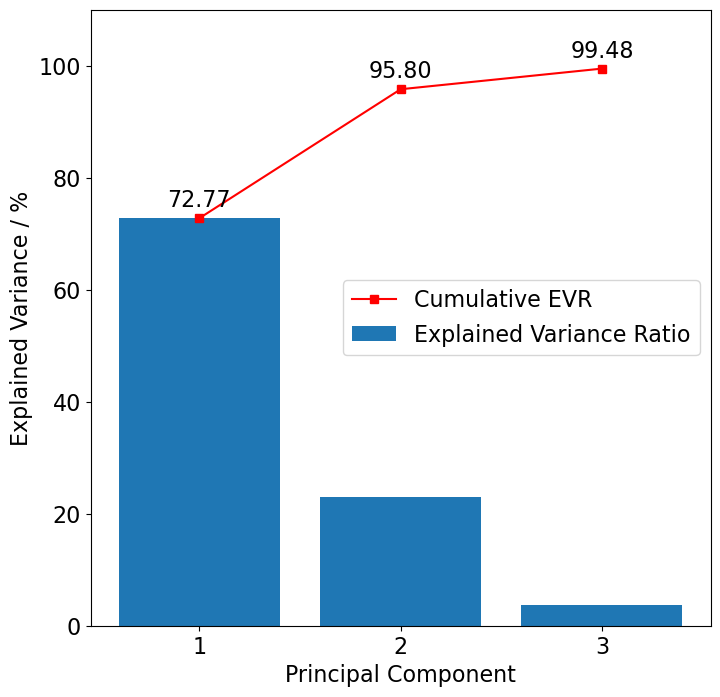

In [18]:
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams["font.size"] = (16)
print(f"explained variance ratio: {pca.explained_variance_ratio_}")

plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_*100, label="Explained Variance Ratio")
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_*100), marker='s', c='red', label="Cumulative EVR")
plt.xlabel('Principal Component', size='16')
plt.xticks(range(1,len(pca.explained_variance_ratio_)+1))
plt.ylabel('Explained Variance / %', size='16')
plt.ylim(0,110)
plt.legend()
for i, v in enumerate(np.cumsum(pca.explained_variance_ratio_*100)):
    plt.text(i+1, v+2, f"{v:.2f}", ha="center")
plt.show()

<div class="warn">
    
The first two components capture 95.8% of the information, whereas the first three ones capture 99.5% of it.
    
The 3rd variance is obviously not very significant. And for sure the 4th component (PC4, not shown here) won't be helpful to separate the three species into three classes.
</div>

##### Transformation of the four widths and lengths features into the 3 PCA components

In [19]:
print('Shape before PCA: ', featuresS.shape)
print('Shape after PCA: ', featuresSPCA.shape)

PC=[]
PC = [f"PC{i}" for i in range(1, pca.n_components_+1)]
 
pca_df = pd.DataFrame(data=featuresSPCA,columns=PC, index=dfi.index)
pca_df = pd.concat([pca_df,y],axis=1)
display(pca_df)
display(pca_df.describe().style.format("{0:.2f}").set_caption("Principal Components"))

Shape before PCA:  (150, 4)
Shape after PCA:  (150, 3)


,PC1,PC2,PC3,species,setosa,versicolor,virginica
0,-2.264542,0.505704,-0.121943,setosa,1.0,0.0,0.0
1,-2.086426,-0.655405,-0.227251,setosa,1.0,0.0,0.0
2,-2.367950,-0.318477,0.051480,setosa,1.0,0.0,0.0
3,-2.304197,-0.575368,0.098860,setosa,1.0,0.0,0.0
4,-2.388777,0.674767,0.021428,setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,1.870522,0.382822,0.254532,virginica,0.0,0.0,1.0
146,1.558492,-0.905314,-0.025382,virginica,0.0,0.0,1.0
147,1.520845,0.266795,0.179277,virginica,0.0,0.0,1.0
148,1.376391,1.016362,0.931405,virginica,0.0,0.0,1.0


,PC1,PC2,PC3,setosa,versicolor,virginica
count,150.00,150.00,150.00,150.00,150.00,150.00
mean,0.00,0.00,0.00,0.33,0.33,0.33
std,1.71,0.96,0.39,0.47,0.47,0.47
min,-2.77,-2.66,-0.86,0.00,0.00,0.00
25%,-2.12,-0.59,-0.26,0.00,0.00,0.00
50%,0.41,0.01,0.02,0.00,0.00,0.00
75%,1.34,0.59,0.20,1.00,1.00,1.00
max,3.31,2.72,1.00,1.00,1.00,1.00


<div class="warn">
The original features have been transformed thanks to this matrix transformation: 
<div>

In [20]:
print(pca.components_)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]]


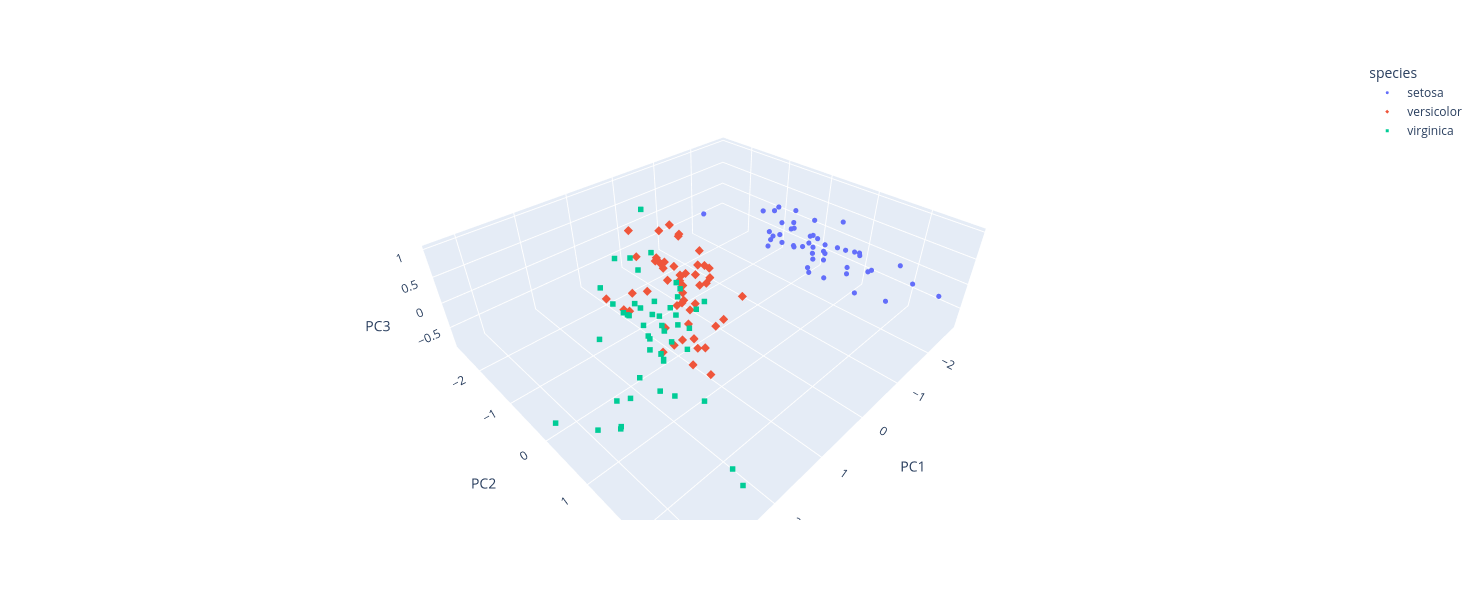

In [21]:
# PC1=pca_df['PC1']
# PC2=pca_df['PC2']
# PC3=pca_df['PC3']
# c=pca_df['species']
# from mpl_toolkits import mplot3d
# plt.rcParams["figure.figsize"] = (8,8) #graphic size
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(PC1, PC2, PC3)

import plotly.express as px
fig=px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',color='species', symbol='species', width=800, height=600)
fig.update_traces(marker=dict(size=3))

<div class="warn">
    
The clusters are extremely easy to see: 
Iris Setosa (Blue), Iris Versicolor (Red), and Iris Virginica (Green)

Note that species 0 (blue dots) is clearly separated in all these plots, but species 1 (green dots) and species 2 (yellow dots) are harder to separate.
    
</div>

### 4.2. Principal components used as features for ML

<div class="rq">
    
PCA is an unsupervised, non-parametric statistical technique that can be used for **dimensionality reduction** (or **data compression**) in machine learning. 
</div>

#### 4.2.a. Library import

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

from sklearn.decomposition import PCA

#### 4.2.b. PCA

##### Reading of data (one hot encoding version)

In [23]:
dfi=pd.read_csv('./iris-data/iris_ohe.csv', sep="\t") 
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

Dfi. Structure (shape) :(150, 8)


,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,virginica,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,virginica,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,virginica,0.0,0.0,1.0


##### Standardization

In [24]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features=dfi[['sepal_length','sepal_width','petal_length','petal_width']]
y=dfi.drop(features.columns, axis=1)
yohe=y.drop('species',axis=1)

scaler.fit(features.values)
featuresS = scaler.transform(features.values) #returns a numpy array
#conversion into a dataframe just for display and plotting purpose
featuresSDF = pd.DataFrame(featuresS, columns=features.columns, index=features.index)

display(featuresSDF.describe().style.format("{0:.2f}").set_caption("features after standardization"))

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.44,-1.57,-1.44
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.12,0.34,0.13
75%,0.67,0.57,0.76,0.79
max,2.49,3.11,1.79,1.71


##### PCA: reduction of 4 features to the number principal components (PC) that contain 96% of the information

In [25]:
pcPCA=0.96
pca = PCA(pcPCA)

featuresSPCA = pca.fit_transform(featuresS)
print(f"Number of components that contain {pcPCA*100:.1f}% of the information: {pca.n_components_}")
print('Shape before PCA: ', featuresS.shape)
print('Shape after PCA: ', featuresSPCA.shape)

PC=[]
PC = [f"PC{i}" for i in range(1, pca.n_components_+1)]
 
pca_df = pd.DataFrame(data=featuresSPCA,columns=PC, index=dfi.index)
pca_df = pd.concat([pca_df,y],axis=1)
display(pca_df)
display(pca_df.describe().style.format("{0:.2f}").set_caption("Principal Components"))

print(f"explained variance ratio: {pca.explained_variance_ratio_}")
print(f"sum of the first two components: {(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])*100:.2f}%")


Number of components that contain 96.0% of the information: 3
Shape before PCA:  (150, 4)
Shape after PCA:  (150, 3)


,PC1,PC2,PC3,species,setosa,versicolor,virginica
0,-2.264542,0.505704,-0.121943,setosa,1.0,0.0,0.0
1,-2.086426,-0.655405,-0.227251,setosa,1.0,0.0,0.0
2,-2.367950,-0.318477,0.051480,setosa,1.0,0.0,0.0
3,-2.304197,-0.575368,0.098860,setosa,1.0,0.0,0.0
4,-2.388777,0.674767,0.021428,setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,1.870522,0.382822,0.254532,virginica,0.0,0.0,1.0
146,1.558492,-0.905314,-0.025382,virginica,0.0,0.0,1.0
147,1.520845,0.266795,0.179277,virginica,0.0,0.0,1.0
148,1.376391,1.016362,0.931405,virginica,0.0,0.0,1.0


,PC1,PC2,PC3,setosa,versicolor,virginica
count,150.00,150.00,150.00,150.00,150.00,150.00
mean,0.00,0.00,0.00,0.33,0.33,0.33
std,1.71,0.96,0.39,0.47,0.47,0.47
min,-2.77,-2.66,-0.86,0.00,0.00,0.00
25%,-2.12,-0.59,-0.26,0.00,0.00,0.00
50%,0.41,0.01,0.02,0.00,0.00,0.00
75%,1.34,0.59,0.20,1.00,1.00,1.00
max,3.31,2.72,1.00,1.00,1.00,1.00


explained variance ratio: [0.72770452 0.23030523 0.03683832]
sum of the first two components: 95.80%


#### 4.2.c. ML

##### Creation of the training and validation sets

In [26]:
data_train = pca_df.sample(frac=0.8, axis='index') # on sélectionne au hasard 80% de l'échantillon
data_valid  = pca_df.drop(data_train.index) # on sélectionne le reste

x_train = data_train[PC]
y_train = data_train[['setosa','versicolor','virginica']]
y_train_species = data_train[['species']] #sera utile à la fin pour comparer la prédiction et l'espèce réelle

x_valid  = data_valid[PC]
y_valid  = data_valid[['setosa','versicolor','virginica']]
y_valid_species = data_valid[['species']] #sera utile à la fin pour comparer la prédiction et l'espèce réelle

print('x_train : ',x_train.shape)
display(x_train)
print('y_train : ',y_train.shape,'y_train_species : ',y_train_species.shape)
display(y_train, y_train_species)

x_train :  (120, 3)


,PC1,PC2,PC3
63,0.717165,-0.185434,-0.067300
92,0.330005,-0.988901,-0.195968
42,-2.557834,-0.453816,0.313572
52,1.242110,0.614822,-0.554847
101,1.153190,-0.701326,0.531465
...,...,...,...
89,0.275425,-1.329816,0.093445
91,0.623171,0.027543,-0.019305
55,0.384458,-0.591062,0.126798
34,-2.188676,-0.448629,-0.246560


y_train :  (120, 3) y_train_species :  (120, 1)


,setosa,versicolor,virginica
63,0.0,1.0,0.0
92,0.0,1.0,0.0
42,1.0,0.0,0.0
52,0.0,1.0,0.0
101,0.0,0.0,1.0
...,...,...,...
89,0.0,1.0,0.0
91,0.0,1.0,0.0
55,0.0,1.0,0.0
34,1.0,0.0,0.0


,species
63,versicolor
92,versicolor
42,setosa
52,versicolor
101,virginica
...,...
89,versicolor
91,versicolor
55,versicolor
34,setosa


##### Definition of the ANN model

In [27]:
def get_model(NI): #NI = number of input neurons
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(NI, name='iLayer'))
    model.add(keras.layers.Dense(7, activation='relu', name='hLayer1'))
    model.add(keras.layers.Dense(5, activation='relu', name='hLayer2'))
    model.add(keras.layers.Dense(3, activation='softmax', name='oLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

##### Training of the model

In [28]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
print(f"x_train. Structure (shape) : {x_train.shape}")
print(f"x_valid. Structure (shape) : {x_valid.shape}")
print(f"y_train. Structure (shape) : {y_train.shape}")
print(f"y_valid. Structure (shape) : {y_valid.shape}")
ANNmodel=get_model( (pca.n_components_,)) # pca.n_components_ PC => pca.n_components_ input neurons
ANNmodel.summary()
vID.chrono_start()
ANNhistory = ANNmodel.fit(x_train,
                    y_train,
                    epochs          = 700,
                    batch_size      = 5,
                    verbose         = 1,
                    validation_data = (x_valid, y_valid),
                    callbacks=[es])
vID.chrono_show()

x_train. Structure (shape) : (120, 3)
x_valid. Structure (shape) : (30, 3)
y_train. Structure (shape) : (120, 3)
y_valid. Structure (shape) : (30, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hLayer1 (Dense)             (None, 7)                 28        
                                                                 
 hLayer2 (Dense)             (None, 5)                 40        
                                                                 
 oLayer (Dense)              (None, 3)                 18        
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________
Epoch 1/700


2022-08-19 15:30:04.716797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


24/24 [==============================] - 1s 18ms/step - loss: 1.4519 - accuracy: 0.2500 - val_loss: 1.1638 - val_accuracy: 0.2333
Epoch 2/700
24/24 [==============================] - 0s 3ms/step - loss: 1.3430 - accuracy: 0.1917 - val_loss: 1.0969 - val_accuracy: 0.3000
Epoch 3/700
24/24 [==============================] - 0s 3ms/step - loss: 1.2508 - accuracy: 0.2417 - val_loss: 1.0369 - val_accuracy: 0.4333
Epoch 4/700
24/24 [==============================] - 0s 3ms/step - loss: 1.1715 - accuracy: 0.3167 - val_loss: 0.9713 - val_accuracy: 0.4000
Epoch 5/700
24/24 [==============================] - 0s 3ms/step - loss: 1.0924 - accuracy: 0.3167 - val_loss: 0.9200 - val_accuracy: 0.4000
Epoch 6/700
24/24 [==============================] - 0s 3ms/step - loss: 1.0239 - accuracy: 0.3167 - val_loss: 0.8793 - val_accuracy: 0.4000
Epoch 7/700
24/24 [==============================] - 0s 3ms/step - loss: 0.9650 - accuracy: 0.3167 - val_loss: 0.8430 - val_accuracy: 0.4000
Epoch 8/700
24/24 [=====

##### Evaluation of the model

In [29]:
evalANN_on_Train = ANNmodel.evaluate(x_train, y_train, verbose=0)
print(f"{color.GREEN}x_train / loss      : {evalANN_on_Train[0]:5.4f}{color.OFF}")
print(f"{color.GREEN}x_train/ accurracy  : {evalANN_on_Train[1]:5.4f}{color.OFF}")
print()
evalANN_on_Valid = ANNmodel.evaluate(x_valid, y_valid, verbose=0)
print(f"{color.BLUE}x_valid / loss      : {evalANN_on_Valid[0]:5.4f}{color.OFF}")
print(f"{color.BLUE}x_valid/ accurracy  : {evalANN_on_Valid[1]:5.4f}{color.OFF}")

x_train / loss      : 0.0485
x_train/ accurracy  : 0.9667

x_valid / loss      : 0.0783
x_valid/ accurracy  : 0.9667


##### Confusion matrices

1/1 [==============================] - 0s 23ms/step


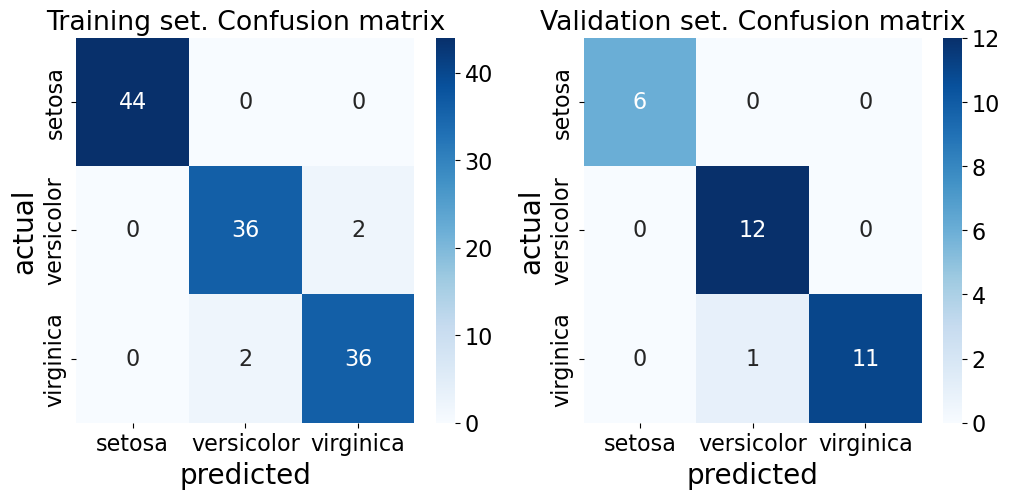

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec
import seaborn as sb

usp = dfi['species'].unique()
y_train_hat=ANNmodel.predict(x_train)
y_valid_hat=ANNmodel.predict(x_valid)

cm_labels = dfi['species'].unique()
cm_tr = confusion_matrix(np.argmax(y_train.to_numpy(),axis=1), np.argmax(y_train_hat,axis=1))
cm_tt = confusion_matrix(np.argmax(y_valid.to_numpy(),axis=1), np.argmax(y_valid_hat,axis=1))

fig=plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax00 = fig.add_subplot(gs[0, 0], title="Training set. Confusion matrix")
sb.heatmap(pd.DataFrame(cm_tr, columns=cm_labels, index=cm_labels), ax=ax00, cmap=plt.cm.Blues, annot = True)
ax00.set_xlabel("predicted", fontsize = 20)
ax00.set_ylabel("actual", fontsize = 20)

ax01=fig.add_subplot(gs[0, 1], title="Validation set. Confusion matrix")
sb.heatmap(pd.DataFrame(cm_tt, columns=cm_labels, index=cm_labels), ax=ax01, cmap=plt.cm.Blues, annot = True)
ax01.set_xlabel("predicted", fontsize = 20)
ax01.set_ylabel("actual", fontsize = 20)
plt.show()

<div class="warn">
    
This 3 principal components-based ML does almost as good as the 4 features ML developped in [Exercice 3](./Iris3-ExoCorrigé.ipynb). It is a modest lowering of the features space, but this simple example examplifies the interest and relevance of doing **data compression**.
</div>

In [31]:
vID.end()

**End at:** Friday 19 August 2022, 15:30:29  
**Duration:** 00:01:17 760ms

<p style="text-align: center"><img width="800px" src="./svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>